<a href="https://colab.research.google.com/github/mukeshsablani3126/ML_Regression-project_yes-bank_stock-closing-prediction/blob/main/ML_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
Problem Statement - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# 1.Importing Libraries and dataset




In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px


In [2]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Yes Bank Stock Prediction ML Capstone  Project-Mukesh Kumar Sablani/YesBank_StockPrices .csv')  #reading the csv file

In [5]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# 2.Data Study

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [7]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


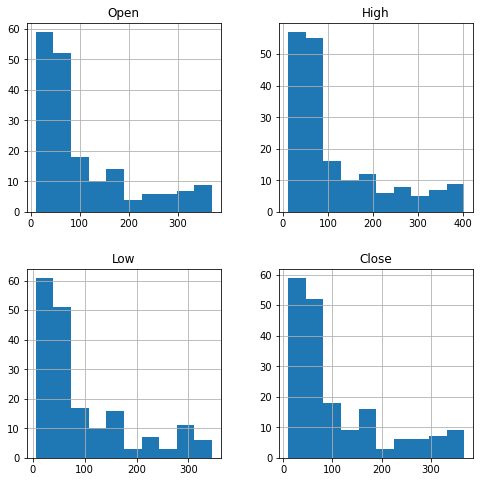

In [ ]:
df.hist(figsize=(8,8))# to see the distribution of values
plt.show()

# 3.Data Manipulation

## 3.1 Finding Null Values

In [ ]:
#To get the percentage of null values each column wise
nullvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) 
nullvalues_percentage

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


## 3.2 Handling outliers

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

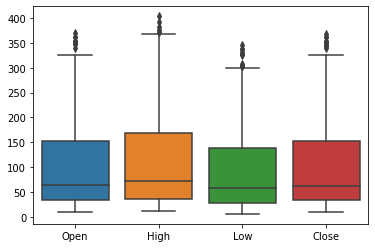

In [ ]:
sns.boxplot(data=df)

In [ ]:
new_df=df.copy()

In [ ]:
for col in ['Open','High','Low','Close']:#redefining the data and setting the outliers value with the range

  # calculate Q1 and Q3
  Q1 = new_df.quantile(0.25)
  Q3 = new_df.quantile(0.75)

  # calculate the IQR
  IQR = Q3 - Q1

  # filter the dataset with the IQR
  IQR_outliers = new_df[((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
  IQR_outliers
  new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  del sys.path[0]


In [ ]:
new_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


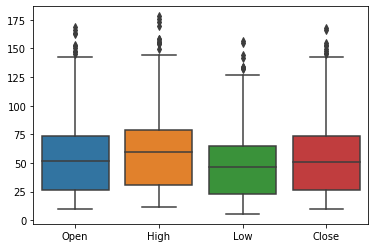

In [ ]:
sns.boxplot(data=new_df)

In [ ]:
new_df.describe()

,Open,High,Low,Close
count,142.000000,142.000000,142.000000,142.000000
mean,58.286197,64.620000,51.434366,57.875141
std,40.017161,42.097066,36.288001,39.419992
min,10.000000,11.240000,5.550000,9.980000
25%,26.760000,31.205000,23.077500,26.835000
50%,51.410000,59.850000,46.265000,51.130000
75%,73.465000,78.675000,65.115000,73.307500
max,169.000000,178.050000,156.450000,167.960000


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
new_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# 4.EDA AND DATA VISUALIZATION

## 4.1 Year-Wise Study Open and Close

In [ ]:
new_df['Date'] = new_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
new_df.set_index('Date',inplace=True)

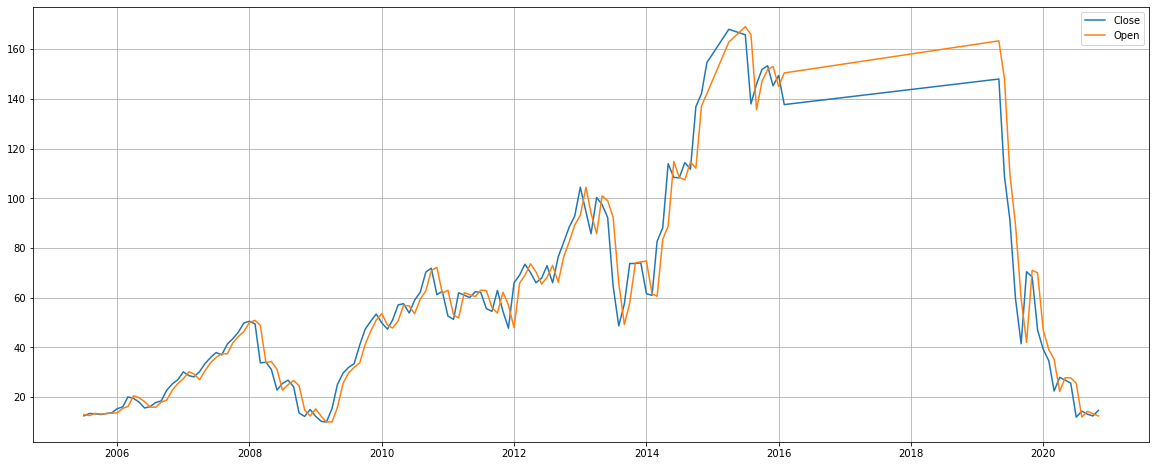

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(new_df['Close'])
plt.plot(new_df['Open'])
plt.legend(['Close','Open'])
plt.grid()

## 4.2 Year-Wise Study High and Low

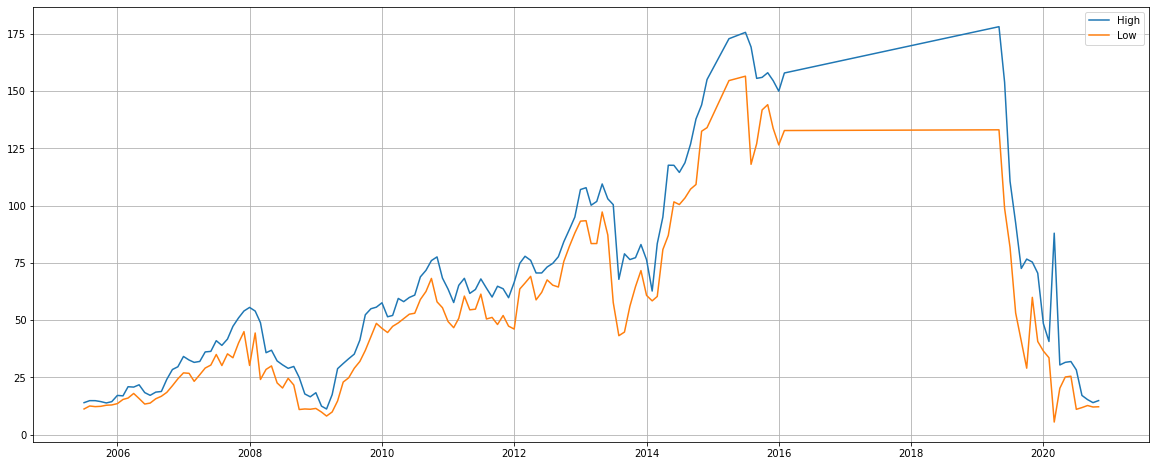

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(new_df['High'])
plt.plot(new_df['Low'])
plt.legend(['High','Low'])
plt.grid()

## 4.3 Data Distribution and mean and median of every variables independently

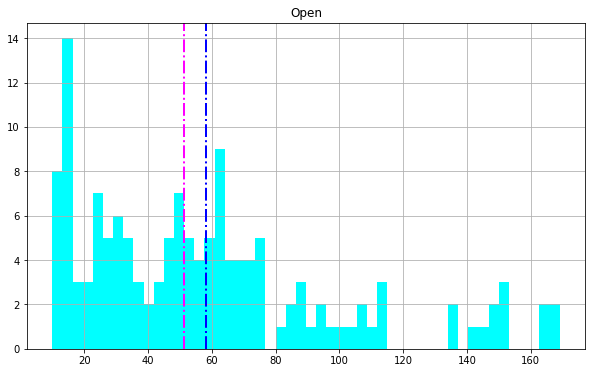

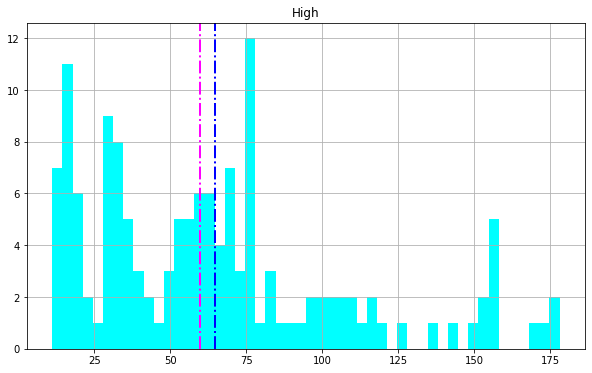

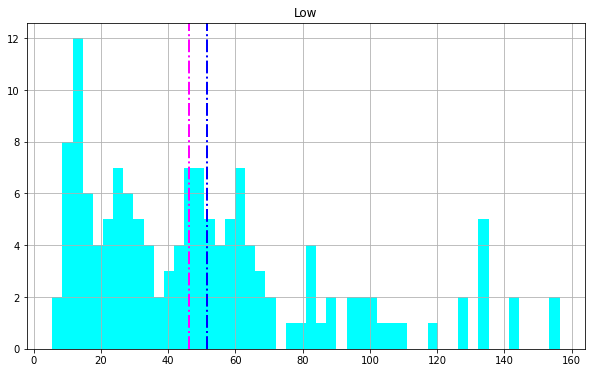

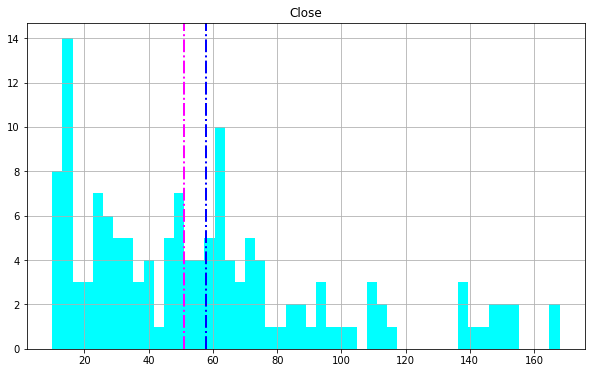

In [ ]:
for i in num_cols[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  features = new_df[i]
  label = new_df['Close']
  features.hist(bins = 50,ax = ax,color = 'cyan')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  ax.set_title(i)

In [ ]:
indep_var=new_df[['High','Low','Open']]
dep_var=new_df['Close']

## 4.4 Independent Variable Study

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

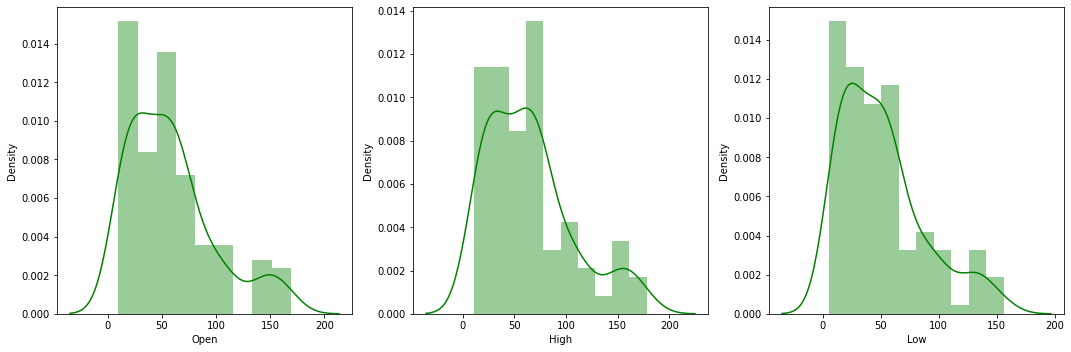

In [ ]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(new_df['Open'], color='g', ax=axs[0])
sns.distplot(new_df['High'], color='g', ax=axs[1])
sns.distplot(new_df['Low'], color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

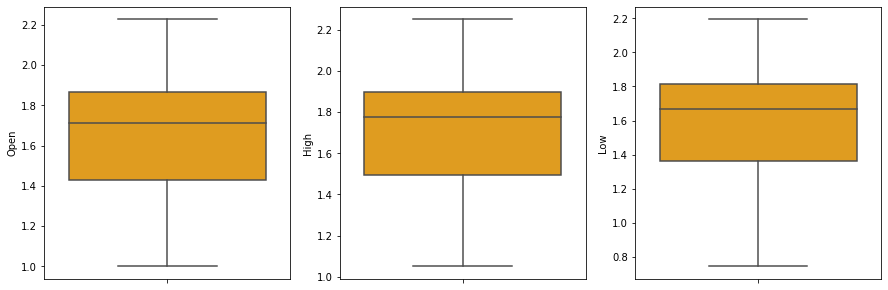

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig = sns.boxplot(y=np.log10(new_df["Open"]), color="orange",ax=axes[0])
fig = sns.boxplot(y=np.log10(new_df["High"]), color="orange",ax=axes[1])
fig = sns.boxplot(y=np.log10(new_df["Low"]), color="orange",ax=axes[2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

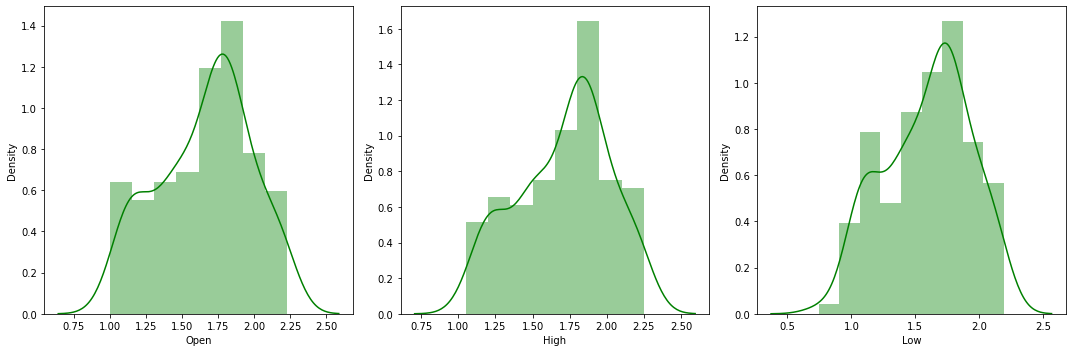

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(np.log10(new_df['Open']), color='g', ax=axs[0])
sns.distplot(np.log10(new_df['High']), color='g', ax=axs[1])
sns.distplot(np.log10(new_df['Low']), color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

## 4.5 Dependent Variables Study and Normalization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


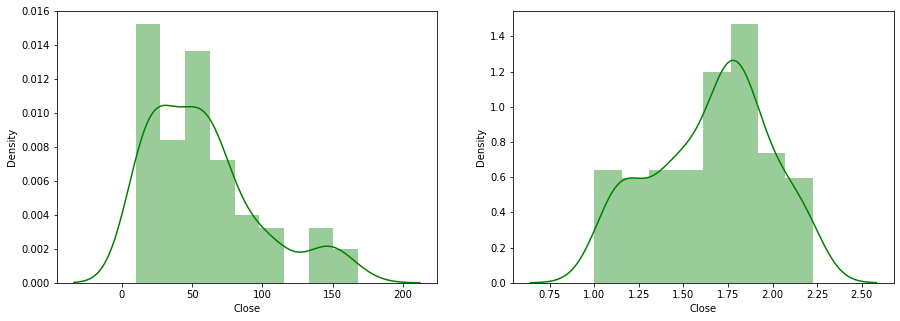

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(new_df['Close'], color='g', ax=axs[0])
sns.distplot(np.log10(new_df['Close']), color='g', ax=axs[1])


## 4.6 Heatmap

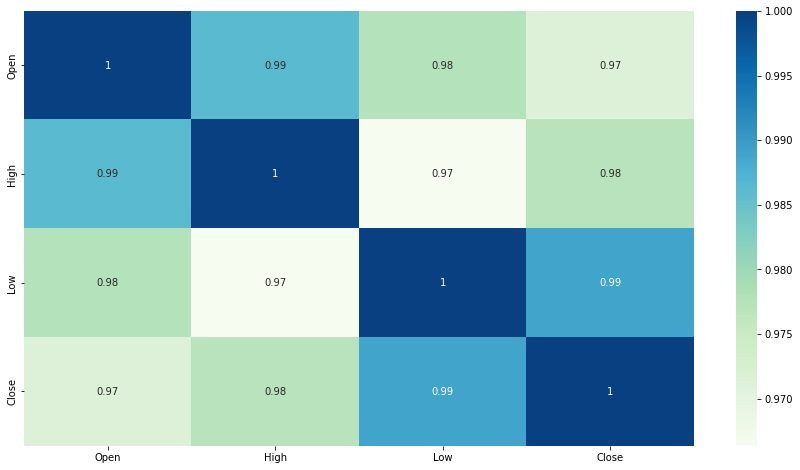

In [ ]:
corr = new_df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'GnBu')

## 4.7 Co-relation between Independent and Dependent variables

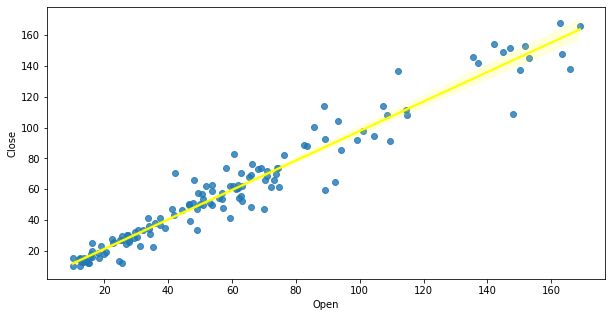

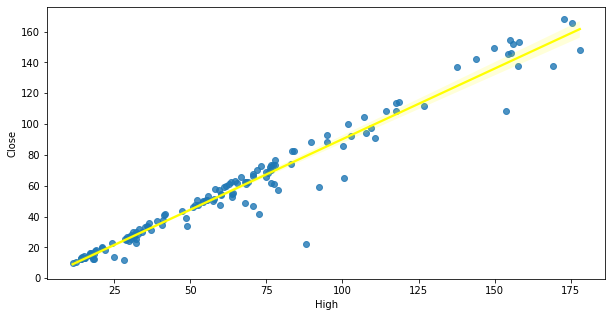

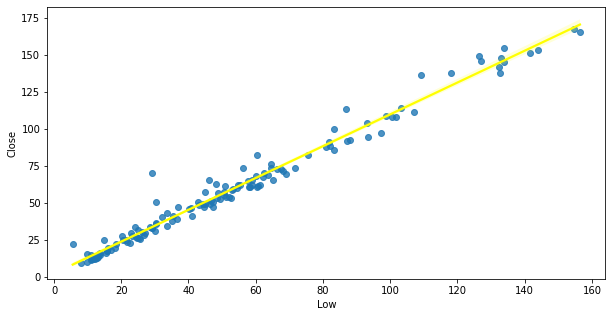

<Figure size 720x360 with 0 Axes>

In [ ]:
#regression plot
for col in new_df.columns.to_list()[:]:
  plt.figure(figsize=(10, 5))
  if col == 'Close':
    pass
  else:
    sns.regplot(x=new_df[col],y=new_df["Close"],line_kws={"color": "yellow"})
plt.show()

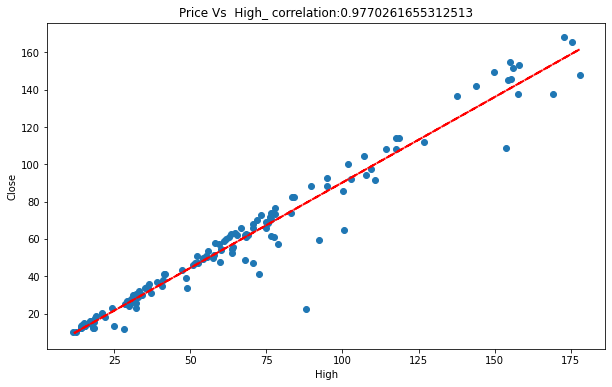

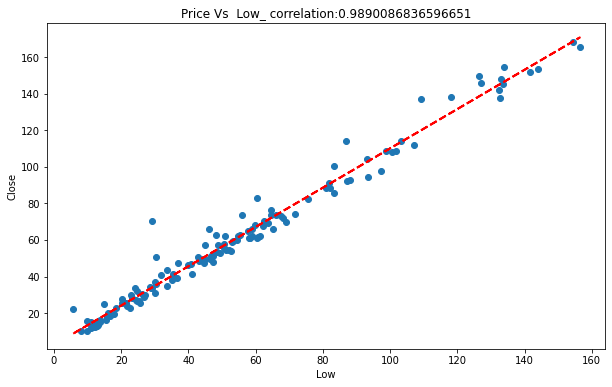

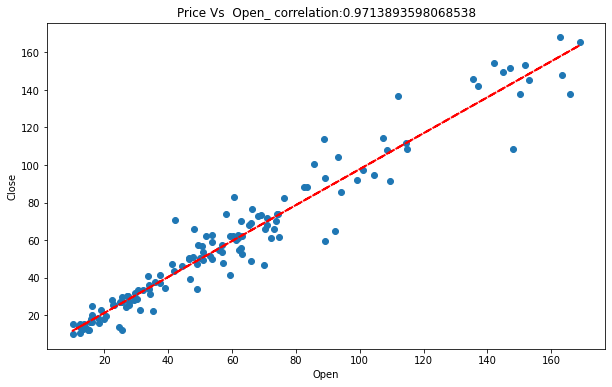

In [ ]:
for col in indep_var[:-1]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  features = new_df[col]
  label = new_df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(new_df[col],new_df['Close'],1)
  y_hat = np.poly1d(z)(new_df[col])
  plt.plot(new_df[col] , y_hat, "r--",lw = 2)
plt.show()
#corelation values are different when we do outliers and then normalization than when we only do normalization

# Train/Test Model